In [1]:
import tensorflow as tf


In [2]:
# import some basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset= pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.drop('CustomerId', axis=1, inplace=True)

In [6]:
dataset.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.drop('Surname', axis=1, inplace=True)

In [8]:
dataset.drop('RowNumber', axis=1, inplace=True)

In [9]:
## divide dataset into dependent and indepenent 

X = dataset.drop('Exited', axis=1)
y=dataset['Exited']

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
#feature engineering
dataset['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
#using dummy variable
geography=pd.get_dummies(X['Geography'], drop_first=True)


In [15]:
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [16]:
##concatenate these variables

X.drop(['Geography','Gender'], axis=1, inplace=True)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


In [19]:
X.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [20]:
X= pd.concat([X,geography, gender], axis=1)

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [22]:
#splitting training and testing

from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [24]:
#feature scaling 

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [25]:
X_train

array([[ 1.67588802, -0.94183739,  0.00934296, ...,  1.74875572,
        -0.57987798, -1.10022343],
       [ 0.30320673, -0.17987213,  1.04687659, ...,  1.74875572,
        -0.57987798,  0.9089063 ],
       [-0.10235819,  0.96307575, -0.33650158, ...,  1.74875572,
        -0.57987798,  0.9089063 ],
       ...,
       [ 0.86475817, -0.08462648, -1.37403521, ..., -0.57183516,
        -0.57987798, -1.10022343],
       [ 0.15761932,  0.39160181,  1.04687659, ..., -0.57183516,
        -0.57987798,  0.9089063 ],
       [ 0.46959234,  1.15356706, -1.37403521, ...,  1.74875572,
        -0.57987798,  0.9089063 ]])

In [26]:
X_test

array([[-0.58071682, -0.65610042, -0.68234612, ...,  1.74875572,
        -0.57987798,  0.9089063 ],
       [-0.29994111,  0.39160181, -1.37403521, ..., -0.57183516,
        -0.57987798,  0.9089063 ],
       [-0.52872132,  0.48684746, -0.33650158, ..., -0.57183516,
         1.72450072, -1.10022343],
       ...,
       [-0.65351053, -0.75134608,  1.73856568, ..., -0.57183516,
        -0.57987798, -1.10022343],
       [-2.22377473,  2.01077798,  0.70103205, ..., -0.57183516,
        -0.57987798,  0.9089063 ],
       [ 0.55278515,  0.67733878, -0.33650158, ...,  1.74875572,
        -0.57987798, -1.10022343]])

In [27]:
X_train.shape

(6700, 11)

In [28]:
### lets create ANN
#using tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [29]:
##lets intialize the ANN

classifier = Sequential()


In [30]:
##adding input layer
#in X there are 1 columns so 1 input node will require

classifier.add(Dense(units=11, activation='relu'))


In [32]:
##adding 1st hidden layer 

classifier.add(Dense(units=7, activation='relu'))

In [33]:
##adding 2nd hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [34]:
#output layer

classifier.add(Dense(1,activation='sigmoid'))

In [37]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01

In [38]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
##early stopping
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [42]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks = es)

Epoch 1/1000
449/449 [==============================] - 2s 3ms/step - loss: 0.3193 - accuracy: 0.8679 - val_loss: 0.3742 - val_accuracy: 0.8440
Epoch 2/1000
449/449 [==============================] - 2s 4ms/step - loss: 0.3173 - accuracy: 0.8694 - val_loss: 0.3765 - val_accuracy: 0.8400
Epoch 3/1000
449/449 [==============================] - 2s 4ms/step - loss: 0.3210 - accuracy: 0.8685 - val_loss: 0.3735 - val_accuracy: 0.8454
Epoch 4/1000
449/449 [==============================] - 2s 5ms/step - loss: 0.3185 - accuracy: 0.8688 - val_loss: 0.3764 - val_accuracy: 0.8481
Epoch 5/1000
449/449 [==============================] - 2s 4ms/step - loss: 0.3240 - accuracy: 0.8650 - val_loss: 0.3706 - val_accuracy: 0.8508
Epoch 6/1000
449/449 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.8641 - val_loss: 0.3741 - val_accuracy: 0.8481
Epoch 7/1000
449/449 [==============================] - 2s 5ms/step - loss: 0.3272 - accuracy: 0.8639 - val_loss: 0.3756 - val_accuracy:

In [43]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

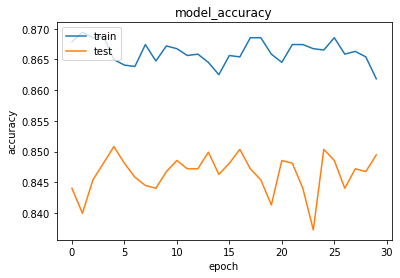

In [44]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

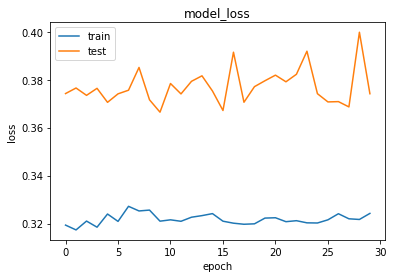

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [46]:
##prediction and evaluation 

y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

In [47]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [48]:
##make confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[2583,   74],
       [ 370,  273]], dtype=int64)

In [50]:
#claculate accuracy


from sklearn.metrics import accuracy_score

score= accuracy_score(y_pred, y_test)

In [51]:
score

0.8654545454545455